# Машинное обучение

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import seaborn as sns

/Users/svkov42/miniconda3/envs/ds/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = load_digits()
x = data.data
y = data.target

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Еще несколько моделей классификации

Во всех алгоритмах ниже будет рассмотрена задача бинарной классификации

## [Support Vector Machine](https://habr.com/ru/post/105220/)

В базовой версии этот алгоритм очень похож на логистическую регрессию - мы строим разделяющую прямую, которая разделяет плоскость на две части.

Классифицирующая функция выглядит так: $F(x) = sign((w, x) + b)$. То есть, возвращает $+1$ или $-1$, в зависимости от того, какому классу принадлежит объект $x$.

Часто мы можем построить несколько прямых, поэтому мы хотим найти прямую с максимальным расстоянием до выборки.

![osh.png](../images/osh.png)

Можно показать, что расстояние до выборки равно $\frac{1}{||w||}$. Вместо задачи максимизации обычно берут задачу минимизации и минимизируют $||w||^2$, что является эквивалентной задачей.

Формально это можно записать так:

$argmin ||w||^2$

$y_i ((w, x_i) + b) \geq 1$

С последним уравнением стоит разобраться. Здесь нам интересны знаки $y_i$ и $(w, x_i) + b$. Если эти выражения будут иметь одинаковые знаки (либо оба плюса, либо оба минуса), то мы правильно решили задачу классификации. Если знаки отличаются, то результат получится отрицательным, и задача решена неверно.

В sklearn этот метод называется `SVC` - support vector classifier. Также есть алгоритм кластеризации support vector clustering, но он не реализован в sklearn.
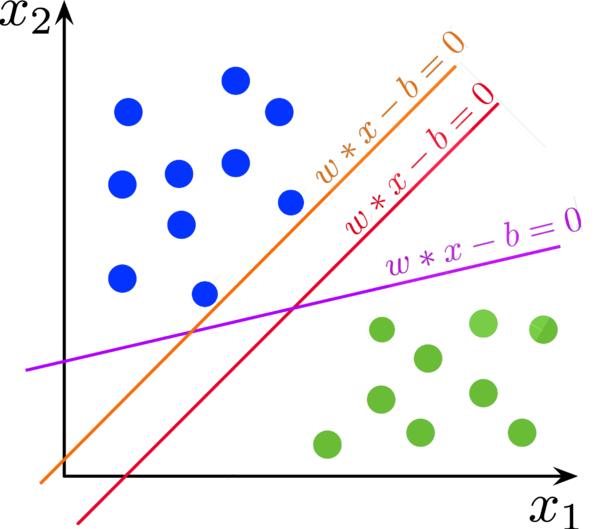

In [4]:
from sklearn.svm import SVC

Сгенерируем случайную выборку и случайные для нее ответы и запустим `SVC`.

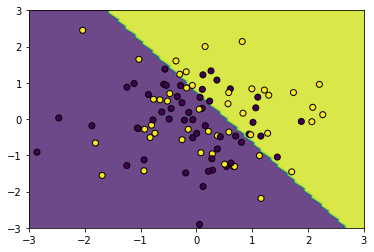

In [6]:
model = SVC(kernel='linear')

n = 100
x = np.random.normal(size=(n, 2))
y = np.random.randint(0, 2, size=(n,))

model.fit(x, y)

x1_plot = np.linspace(-3, 3, 100)
x2_plot = np.linspace(-3, 3, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_plot, x2_plot)
x_plot = np.vstack((x1_mesh.ravel(), x2_mesh.ravel())).T

res = model.predict(x_plot).reshape(x1_mesh.shape)
plt.contourf(x1_mesh, x2_mesh, res, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='black')

Как можно заметить, если выборка не разделяется линейно, то модель работает не слишком хорошо. В таком случае используют другие ядра - например, `rbf` и `poly`.

Математически это означает, что в функции $F(x) = sign((w, \phi (x)) + b)$ вводится новая функция $\phi(x)$, которая преобразует исходные данные к более простому для модели виду.

В случае с линейным ядром, эта функция равна $\phi(x) = x$.


### Виды ядер
Есть три основных вида ядер: линейное, полиномиальное и RBF.

**Линейное ядро.**
Это самый простой тип ядра, обычно одномерный по своей природе. Это оказывается лучшей функцией, когда есть много признаков. Линейное ядро в основном предпочтительнее для задач классификации текста, поскольку большинство таких задач классификации можно разделить линейно.
Линейные функции ядра работают быстрее , чем другие функции. 

![../images/svm_linear.png](../images/svm_linear.png)
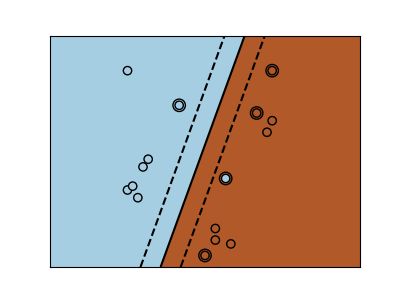

**Полиномиальное ядро.**
Это более обобщенное представление линейного ядра. Он не так предпочтителен, как другие функции ядра, поскольку он менее эффективен и точен.

![../images/svm_poly.png](../images/svm_poly.png)
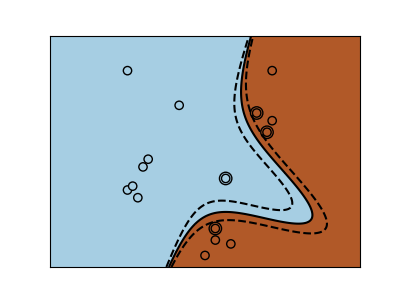

**RBF(радиальная базисная функция) ядро.**
Это одна из наиболее предпочтительных и используемых функций ядра в svm. Обычно его выбирают для нелинейных данных. Это помогает сделать правильное разделение, когда нет предварительных знаний о данных.

![../images/svm_rbf.png](../images/svm_rbf.png)
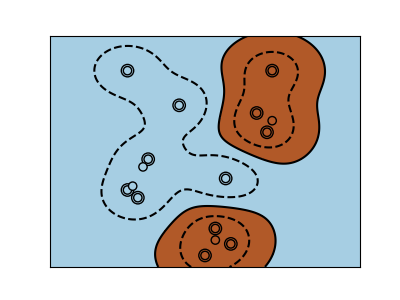

Рассмотрим работу классификатора на примере. Для начала, нам нужно сгенерировать данные, на которых будут производиться эксперименты:

## Задача

Запустить `SVC` на датасете с цифрами, подобрать лучшее ядро при помощи полного поиска по сетке

## kNN

Модель K ближайших соседей отличается от всех предыдущих по принципу работы. Ранее мы оценивали коэффициенты модели по обучающей выборке, но модель kNN не нуждается в обучении как таковом.

Принцип работы следующий:

- Получаем новый объект из тестовой выборки
- Считаем расстояние до всех ближайших объектов из тренировочной выборки
- Находим К ближайших соседей
- Ответ получаем как голосование этих К соседей

![../images/knn-algo.png](../images/knn-algo.png)

Как мы можем заметить, у модели есть всего один параметр - К. Его всегда подбирают в зависимости от выборки. 

Также можно выбрать метрику для подсчета расстоярния между объектами и способ поиска ближайших соседей.

Модель очень простая, поэтому редко работает хорошо. Также модель будет медленно работать с данными большой размерности

Чаще всего в качестве метрики расстояния для непрерывных величин используют евклидово расстояние. Для дискретных величин необходимо подбирать подходящую метрику в зависимости от контекста величин, например, для текста можно использовать расстояние Хэмминга. Встречаются случаи, когда метрика расстояния заменяется на метрику различия или сходства объектов.

Какие бывают расстояния можно посмотреть [тут](https://ml-handbook.ru/chapters/metric_based/intro#выбор-метрики)

Важно помнить, что kNN будет плохо работать на данных большой размерности из-за [проклятия размерности](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%BE%D0%BA%D0%BB%D1%8F%D1%82%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8)
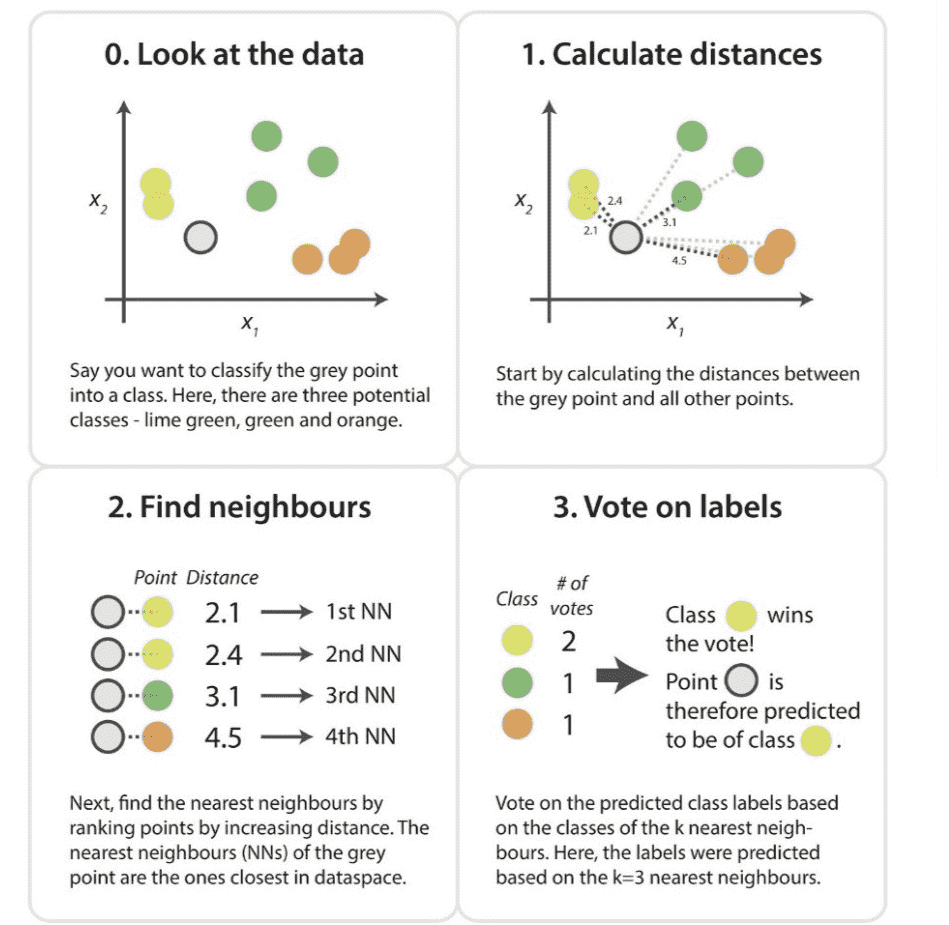

In [7]:
from sklearn.neighbors import KNeighborsClassifier

## Задача

Применить модель к датасету с цифрами. Подобрать оптимальное количество соседей.

In [8]:
model = KNeighborsClassifier(n_neighbors=5)
# Ваш код здесь


## [Наивный байесовский классификатор](https://habr.com/ru/post/120194/)

НБК - это простой, но довольно полезный алгоритм классификации, который полностью построен на теореме Байеса.

Пусть у нас есть элемент $x$, который может пренадлежать одному из классов $c \in C$. Тогда нам нужно при какой метке класса вероятность принадлежности будет максимальная:

### $c_{opt} = argmax_{c} P(c|x)$

Используя теорему Байеса вероятность можно переписать так:

### $P(c|x) = \frac {P(x|c)P(c)} {P(x)}$

Вектор $x$ состоит из признаков $x_1, \dots, x_n$, поэтому формулу можно записать так:

### $P(c|x_1 \dots x_n) = \frac {P(x_1 \dots x_n | c) P(c)} {P(x_1 \dots x_n)}$

Значение в знаменателе нас не интересует, так как это константа, а нам нужно найти максимум.

Выражение выглядит довольно сложно, поэтому сделаем предположение, что признаки между собой независимы (например, возраст и пол пассажира на титанике, или значение в первом и втором пикселе на картинке). Тогда можно переписать числитель так:

### $P(x_1 \dots x_n | c) P(c) = P(c) P(x_1|c) P(x_2 | c) \dots P(x_n| c) = P(c) \prod_{i} P(x_i|c)$

Запишем исходную задачу, используя эти формулы:

### $c_{opt} = argmax_{c} = argmax_{c} P(c) \prod_{i} P(x_i|c)$

Все эти значения мы можем посчитать:

- $P(c)$ - вероятность встретить класс в выборке
- $P(x_i|c)$ - вероятность, что встретим значение $x_i$ при классе $c$

Подсчет этих значений и есть обучение классификатора.

Алгоритм требует немного данных для работы, довольно быстро работает (градиентных спусков нет, хранить в памяти тоже почти ничего не нужно) и часто обходит в точности другие, более сложные, алгоритмы (деревья решений и логистическую регрессию, например).

Также немаловажный плюс - можно задать априорные вероятности классов $P(c)$, если у нас скошенная выборка, либо мы знаем об ошибке в сборе данных.

Однако есть недостаток - алгоритм предполагает, что признаки независимы, а это не так в случае со словами в тексте, например.

In [10]:
# Для бинарной классификации
from sklearn.naive_bayes import GaussianNB

# Для мультикласса
from sklearn.naive_bayes import MultinomialNB

## Задача

Попробовать НБК на данных о цифрах. 

## Задача

Сравнить качества моделей между собой. Есть ли статистически значимые различия между результатами моделей? Если есть, то какая модель решила задачу лучше всего? 


# Домашнее задание

Работаем с датасетом про дорожные знаки.

https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed/data

В первых двух задачах берем только файл train.pickle и можно подгрузить labels_names.csv

Данные можно прочитать через `pd.read_pickle`

## Easy

Скачать датасет, обучить логистическую регрессию, измерить качество.

Текстом кратко обосновать какую метрику выбираем и почему такую.

Какой вид дорожных знаков модель путает чаще всего?

## Medium

Обучить и сравнить между собой:

- логистическая регрессия
- kNN
- НБК
- SVM (попробовать 3 разных ядра)

Какая модель отработала лучше, а какая хуже всех?

Проинтерпретируйте почему худшая модель именно эта.

## Hard

Вы - ML-инженер в команде беспилотных автомобилей! Ваша следующая цель - сделать алгоритм, который будет распознавать дорожные знаки. Другая команда уже позаботилась о подготовке данных - вам приходят обрезанные картинки 32х32. Но есть проблема - разметка стоит денег, у проекта есть бюджетные ограничения, но вам готовы выделить тот бюджет, который вы сможете обосновать.

Определите сколько и каких семплов данных необходимо для того, чтобы обучить достаточно хороший алгоритм.

**Подсказка:** При анализе изображений обычно делают специальную предобработку - картинки крутят-вертят, по-разному меняют цвета. Рядом с данными лежит питоновский скрипт, может быть он поможет уменьшить необходимое количество семплов?